# Simple regression model

In [1]:
from toolbox import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

## Load data

In [2]:
ws = load_weather_station_data('./data/weather_station_list.csv')
w = load_weather_data('./data/weather_collections/weather_daily_region.csv')

gs = load_groundwater_station_data('./data/groundwater/bergstraße/gw_stations_bergstraße.csv')
g = load_groundwater_data('./data/groundwater/bergstraße/gw.csv')

gs_agg = calc_aggregate_station_data(gs, g)
gs_agg = calc_initial_station_data(gs_agg, g, 1)


In [3]:
g_merged = merge_groundwater_data(g, gs_agg)
g_merged.describe()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,measure_elev,lifespan,water_level_mean,water_depth_mean,water_temp_mean,ini_1_years_water_depth_mean,ini_1_years_water_depth_std,ini_1_years_water_depth_min,ini_1_years_water_depth_max,water_depth_anomaly
count,557260.000000,557260,554273.000000,554273.000000,554273.000000,66890.00000,557260.000000,5.572600e+05,557260,557260,...,557260.000000,557260,557247.000000,557247.000000,144944.000000,556583.000000,556583.000000,556583.000000,556583.000000,553695.000000
mean,13589.102144,1995-03-01 05:35:27.078921728,3.594004,89.469690,3.220631,12.27388,465759.276823,5.501905e+06,1966-12-22 22:03:30.291784800,2017-11-11 00:57:30.511431168,...,93.146810,18586 days 02:54:00.219646208,89.466250,3.222664,12.190641,3.008068,0.225393,2.528968,3.361641,0.211620
min,12890.000000,1912-10-15 00:00:00,0.000000,81.140000,-0.870000,2.02000,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,...,86.500000,134 days 00:00:00,83.935770,0.968683,10.746667,0.634151,0.014618,-0.080000,0.750000,-5.058679
25%,13157.000000,1980-08-25 00:00:00,2.500000,86.900000,2.100000,11.30000,461900.003000,5.497120e+06,1953-01-01 00:00:00,2024-03-01 00:00:00,...,90.520000,15765 days 00:00:00,86.885700,2.210565,11.493786,1.873333,0.125076,1.360000,2.230000,-0.444151
50%,13568.000000,1997-12-01 00:00:00,3.360000,89.240000,3.030000,12.00000,466857.965000,5.501588e+06,1973-01-01 00:00:00,2024-03-01 00:00:00,...,93.220000,18322 days 00:00:00,89.014528,3.028495,11.959470,2.806538,0.182364,2.220000,3.110000,0.151321
75%,13774.000000,2013-08-22 00:00:00,4.400000,92.090000,4.040000,12.90000,469927.000000,5.505957e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,...,95.760000,23801 days 00:00:00,91.933931,4.000772,12.636749,3.892075,0.266639,3.390000,4.270000,0.794151
max,17794.000000,2024-03-20 00:00:00,11.160000,96.270000,10.790000,21.30000,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,...,100.560000,40968 days 00:00:00,94.533442,8.493808,14.117103,9.955283,0.800611,9.080000,10.740000,5.858491
std,609.112889,NaN,1.527469,3.005891,1.476485,1.55057,4829.443303,6.203696e+03,NaN,NaN,...,3.032113,6842 days 14:06:22.419255168,2.932930,1.320438,0.818067,1.638374,0.150243,1.723007,1.620462,1.138328


In [4]:
g_merged.head()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,lifespan,geometry,water_level_mean,water_depth_mean,water_temp_mean,ini_1_years_water_depth_mean,ini_1_years_water_depth_std,ini_1_years_water_depth_min,ini_1_years_water_depth_max,water_depth_anomaly
date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,13595,1979-01-01,9.48,89.76,8.45,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.9475
1979-01-08,13595,1979-01-08,9.49,89.75,8.46,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.9375
1979-01-15,13595,1979-01-15,9.89,89.35,8.86,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.5375
1979-01-29,13595,1979-01-29,9.98,89.26,8.95,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.4475
1979-02-05,13595,1979-02-05,10.00,89.24,8.97,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.4275


In [5]:
m = pd.merge(g_merged, w,
             how='left', left_index=True, right_index=True)

# restrict data to the post-war period
m = m.loc[m.date > pd.to_datetime('1950-01-01')]

# drop all rows with a date after the weather data cutoff date
m = m.loc[m.date <= pd.to_datetime('2022-12-31')]

m = m.dropna(subset=['station_id_count'])

m['week_of_year'] = m['date'].dt.isocalendar().week

In [6]:
#m.info()

In [7]:
m.describe()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,precip_mean_prev_90d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean,tmean_mean_prev_90d_mean,week_of_year
count,535080.000000,535080,532286.000000,532286.000000,532286.000000,58281.000000,535080.000000,5.350800e+05,535080,535080,...,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.0
mean,13584.383032,1995-01-26 12:10:28.768782208,3.605169,89.464313,3.229522,12.234722,465762.831671,5.501887e+06,1967-01-27 18:55:06.768333728,2017-11-06 20:27:37.017267712,...,69.390480,82.318911,5.245498,13.079499,56.048417,168.136895,10.443488,10.444661,10.441032,26.661774
min,12890.000000,1950-01-02 00:00:00,0.000000,81.140000,-0.870000,2.020000,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,...,25.290000,35.250000,0.000000,0.000000,0.325000,41.320000,-11.031746,-8.513333,-4.064444,1.0
25%,13159.000000,1980-11-03 00:00:00,2.500000,86.900000,2.110000,11.300000,461900.003000,5.497120e+06,1953-01-01 00:00:00,2024-03-01 00:00:00,...,60.000000,73.000000,3.656045,2.975000,33.757143,127.200000,4.785714,4.592000,4.935926,14.0
50%,13564.000000,1997-05-26 00:00:00,3.370000,89.240000,3.040000,12.000000,466857.965000,5.501538e+06,1973-01-01 00:00:00,2024-03-01 00:00:00,...,71.000000,85.000000,4.979960,9.500000,51.760000,163.850000,10.403571,10.344762,10.422540,27.0
75%,13773.000000,2012-11-19 00:00:00,4.410000,92.100000,4.070000,12.800000,469937.000000,5.505957e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,...,79.000000,93.000000,6.601767,19.200000,73.871429,204.142857,16.451020,16.551667,16.147460,40.0
max,17794.000000,2022-12-31 00:00:00,11.160000,96.270000,10.790000,21.300000,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,...,99.000000,100.000000,22.487033,122.671429,214.471429,384.700000,28.671429,24.437778,22.301852,53.0
std,599.613919,NaN,1.521245,2.998210,1.477947,1.549757,4850.075874,6.171791e+03,NaN,NaN,...,13.056577,12.877276,2.275008,12.889888,30.296119,54.912199,7.094874,6.682626,5.995027,15.052767


## Create intuitive dummy model

As baseline, we can assume that water_depth is proportional to temp.

In [8]:
def dummy_model(t):
    return 0.05 * t + 2

dummy_model(10)

2.5

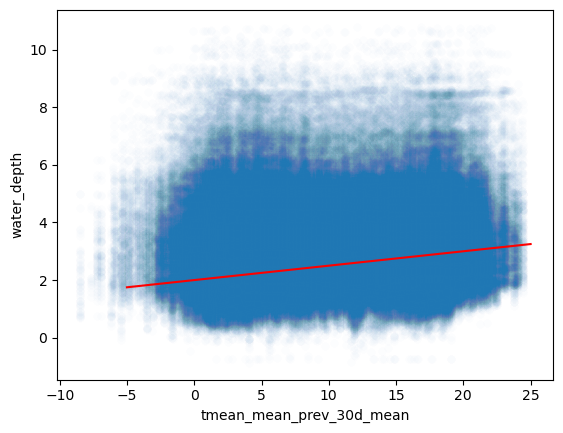

In [9]:
m_plot = m[['tmean_mean_prev_30d_mean', 'water_depth']].reset_index()
m_plot

sns.scatterplot(data=m_plot, 
            x='tmean_mean_prev_30d_mean', y='water_depth',
            alpha=0.01)
            
# works but is very slow (takes 10 minutes)
#sns.kdeplot(data=m_plot, 
#            x='tmean_mean_prev_30d_mean', y='water_depth',
               #alpha=0.01
#           )

x1, x2 = -5, 25
plt.plot([x1, x2],[dummy_model(x1), dummy_model(x2)], 'r');
            

## Train-test split

In [10]:
#m.columns.unique()

In [11]:
# restrict data
df = m[['station_id',
        'date',
        'water_depth',
        'ground_elev',
        'ini_1_years_water_depth_mean',
        'ini_1_years_water_depth_std',
        'ini_1_years_water_depth_min',
        'ini_1_years_water_depth_max',
        'precip_mean',
        'tmean_mean',
        'moisture_mean',
        'precip_mean_prev_7d_sum',
        'precip_mean_prev_30d_sum',
        'precip_mean_prev_90d_sum',
        'tmean_mean_prev_7d_mean',
        'tmean_mean_prev_30d_mean',
        'tmean_mean_prev_90d_mean'
       ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 535080 entries, 1950-01-02 to 2022-12-31
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   station_id                    535080 non-null  int64         
 1   date                          535080 non-null  datetime64[ns]
 2   water_depth                   532286 non-null  float64       
 3   ground_elev                   535080 non-null  float64       
 4   ini_1_years_water_depth_mean  534403 non-null  float64       
 5   ini_1_years_water_depth_std   534403 non-null  float64       
 6   ini_1_years_water_depth_min   534403 non-null  float64       
 7   ini_1_years_water_depth_max   534403 non-null  float64       
 8   precip_mean                   535080 non-null  float64       
 9   tmean_mean                    535080 non-null  float64       
 10  moisture_mean                 535080 non-null  float64       
 1

In [12]:
df[df.isna().any(axis=1)]

,station_id,date,water_depth,ground_elev,ini_1_years_water_depth_mean,ini_1_years_water_depth_std,ini_1_years_water_depth_min,ini_1_years_water_depth_max,precip_mean,tmean_mean,moisture_mean,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,precip_mean_prev_90d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean,tmean_mean_prev_90d_mean
date,,,,,,,,,,,,,,,,,
1950-08-15,12926,1950-08-15,NaN,89.20,3.343750,0.239325,2.72,3.63,0.000000,19.175000,69.428571,8.662500,100.250000,261.150000,19.533929,19.599167,19.460139
1951-07-16,13490,1951-07-16,NaN,90.13,2.404138,0.106050,2.16,2.54,0.477778,14.722222,81.125000,14.888889,81.166667,210.955556,19.669841,18.000370,15.442469
1951-07-16,12895,1951-07-16,NaN,87.21,0.893529,0.327107,0.17,1.56,0.477778,14.722222,81.125000,14.888889,81.166667,210.955556,19.669841,18.000370,15.442469
1951-07-16,13726,1951-07-16,NaN,93.50,2.139677,0.266639,1.63,2.61,0.477778,14.722222,81.125000,14.888889,81.166667,210.955556,19.669841,18.000370,15.442469
1951-07-16,13489,1951-07-16,NaN,88.23,1.195517,0.407533,-0.05,1.57,0.477778,14.722222,81.125000,14.888889,81.166667,210.955556,19.669841,18.000370,15.442469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,12901,2022-12-12,NaN,90.56,3.137500,0.095834,2.94,3.27,0.000000,-2.825000,85.625000,0.075000,52.050000,223.150000,0.439286,4.616667,9.841667
2022-12-19,13764,2022-12-19,NaN,96.13,4.980755,0.291329,4.64,5.53,0.025000,0.925000,85.060000,1.050000,22.325000,190.075000,-3.746429,1.835000,8.528333
2022-12-19,12901,2022-12-19,NaN,90.56,3.137500,0.095834,2.94,3.27,0.025000,0.925000,85.060000,1.050000,22.325000,190.075000,-3.746429,1.835000,8.528333


In [13]:
df = df.dropna()

In [14]:
ids = list(df.station_id.unique())

# Calculate 80% of the list's length
num_elements = round(len(ids) * 0.8)

# Randomly select 80% of the elements
train_ids = random.sample(ids, k=num_elements)

In [15]:
train = df.loc[df.station_id.isin(train_ids)]
test = df.loc[~df.station_id.isin(train_ids)]

In [16]:
# define X and y
y_train = train.pop('water_depth')
y_test = test.pop('water_depth')

X_train = train.copy().drop(['station_id', 'date'], axis=1)
X_test = test.copy().drop(['station_id', 'date'], axis=1)

In [17]:
X_train

,ground_elev,ini_1_years_water_depth_mean,ini_1_years_water_depth_std,ini_1_years_water_depth_min,ini_1_years_water_depth_max,precip_mean,tmean_mean,moisture_mean,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,precip_mean_prev_90d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean,tmean_mean_prev_90d_mean
date,,,,,,,,,,,,,,
1950-01-02,90.30,2.077381,0.096779,1.92,2.34,7.325,0.200,79.857143,7.525,57.825,144.85,2.825000,4.077500,6.524861
1950-01-02,96.27,2.143396,0.162823,1.87,2.44,7.325,0.200,79.857143,7.525,57.825,144.85,2.825000,4.077500,6.524861
1950-01-02,88.70,0.729808,0.014618,0.71,0.75,7.325,0.200,79.857143,7.525,57.825,144.85,2.825000,4.077500,6.524861
1950-01-02,92.37,3.496226,0.137746,3.29,3.80,7.325,0.200,79.857143,7.525,57.825,144.85,2.825000,4.077500,6.524861
1950-01-02,95.72,2.379245,0.303435,1.95,3.11,7.325,0.200,79.857143,7.525,57.825,144.85,2.825000,4.077500,6.524861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,95.89,1.904118,0.259061,1.40,2.26,0.000,15.075,69.410000,13.575,44.650,160.50,8.939286,3.178333,8.268611
2022-12-31,93.71,1.757925,0.220701,1.18,2.05,0.000,15.075,69.410000,13.575,44.650,160.50,8.939286,3.178333,8.268611
2022-12-31,99.92,9.214510,0.096795,9.08,9.40,0.000,15.075,69.410000,13.575,44.650,160.50,8.939286,3.178333,8.268611


In [18]:
#X_train.info()
#y_test.info()

In [19]:
# test dummy model
dummy_y_test_pred = dummy_model(X_test['tmean_mean_prev_30d_mean'])
dummy_y_test_pred

date
1950-01-02    2.203875
1950-01-09    2.165500
1950-01-16    2.207313
1950-01-16    2.207313
1950-01-16    2.207313
                ...   
2022-12-31    2.158917
2022-12-31    2.158917
2022-12-31    2.158917
2022-12-31    2.158917
2022-12-31    2.158917
Name: tmean_mean_prev_30d_mean, Length: 118395, dtype: float64

In [20]:
calc_metrics(y_test, dummy_y_test_pred)

MAE 1.1926834750033015
RMSE 1.610230976278319
MAPE 0.43183909433159473
R2 -0.2897601302032784


{'MAE': 1.1926834750033015,
 'RMSE': 1.610230976278319,
 'MAPE': 0.43183909433159473,
 'R2': -0.2897601302032784}

In [21]:
def calc_residuals(y_test, y_pred):
    resid = pd.DataFrame()
    resid['observed'] = y_test.copy()
    resid['predicted'] = y_pred.copy()
    resid['residuals'] = resid['predicted'] - resid['observed']
    return resid

residuals = calc_residuals(y_test, dummy_y_test_pred)


/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


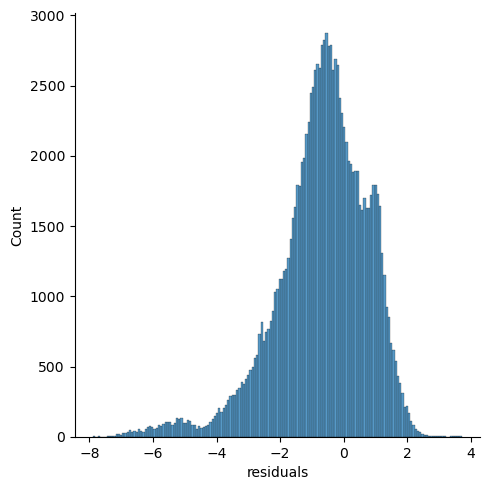

In [22]:
sns.displot(residuals['residuals'])

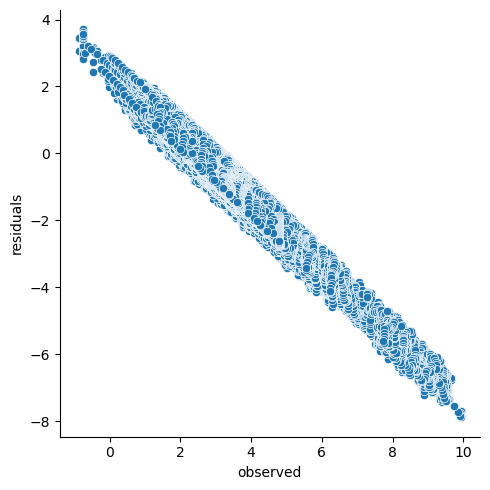

In [23]:
sns.relplot(data=residuals, x='observed', y='residuals')

## Build pipeline